# 2.2.1 Исследование взаимной диффузии газов

In [1]:
### t(s), V(mv)
### 1.902,15.33\n

import csv
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from matplotlib.pyplot import cm

DATA_DIR  = pathlib.Path('lab_data/')
FILENAMES = []
for item in DATA_DIR.iterdir():
    if item.is_file():
        FILENAMES.append(item.name)

120.csv
k = -0.0017908606265207906, b = 2.6206420131172905
tau = 558.3907453159871, U_0 = 13.744544931201984

200.csv
k = -0.0010934082311795535, b = 2.6819415289342987
tau = 914.5714944190735, U_0 = 14.613438183830317

160.csv
k = -0.001397278788980396, b = 2.6338594873017
tau = 715.6767911217681, U_0 = 13.927419003311462

40.csv
k = -0.004687381133080546, b = 2.7415181167078075
tau = 213.33874323609786, U_0 = 15.510514002462125

80.csv
k = -0.0029639828393739106, b = 2.536358765206254
tau = 337.38386967558574, U_0 = 12.633585267074913

[558.3907453159871, 914.5714944190735, 715.6767911217681, 213.33874323609786, 337.38386967558574]


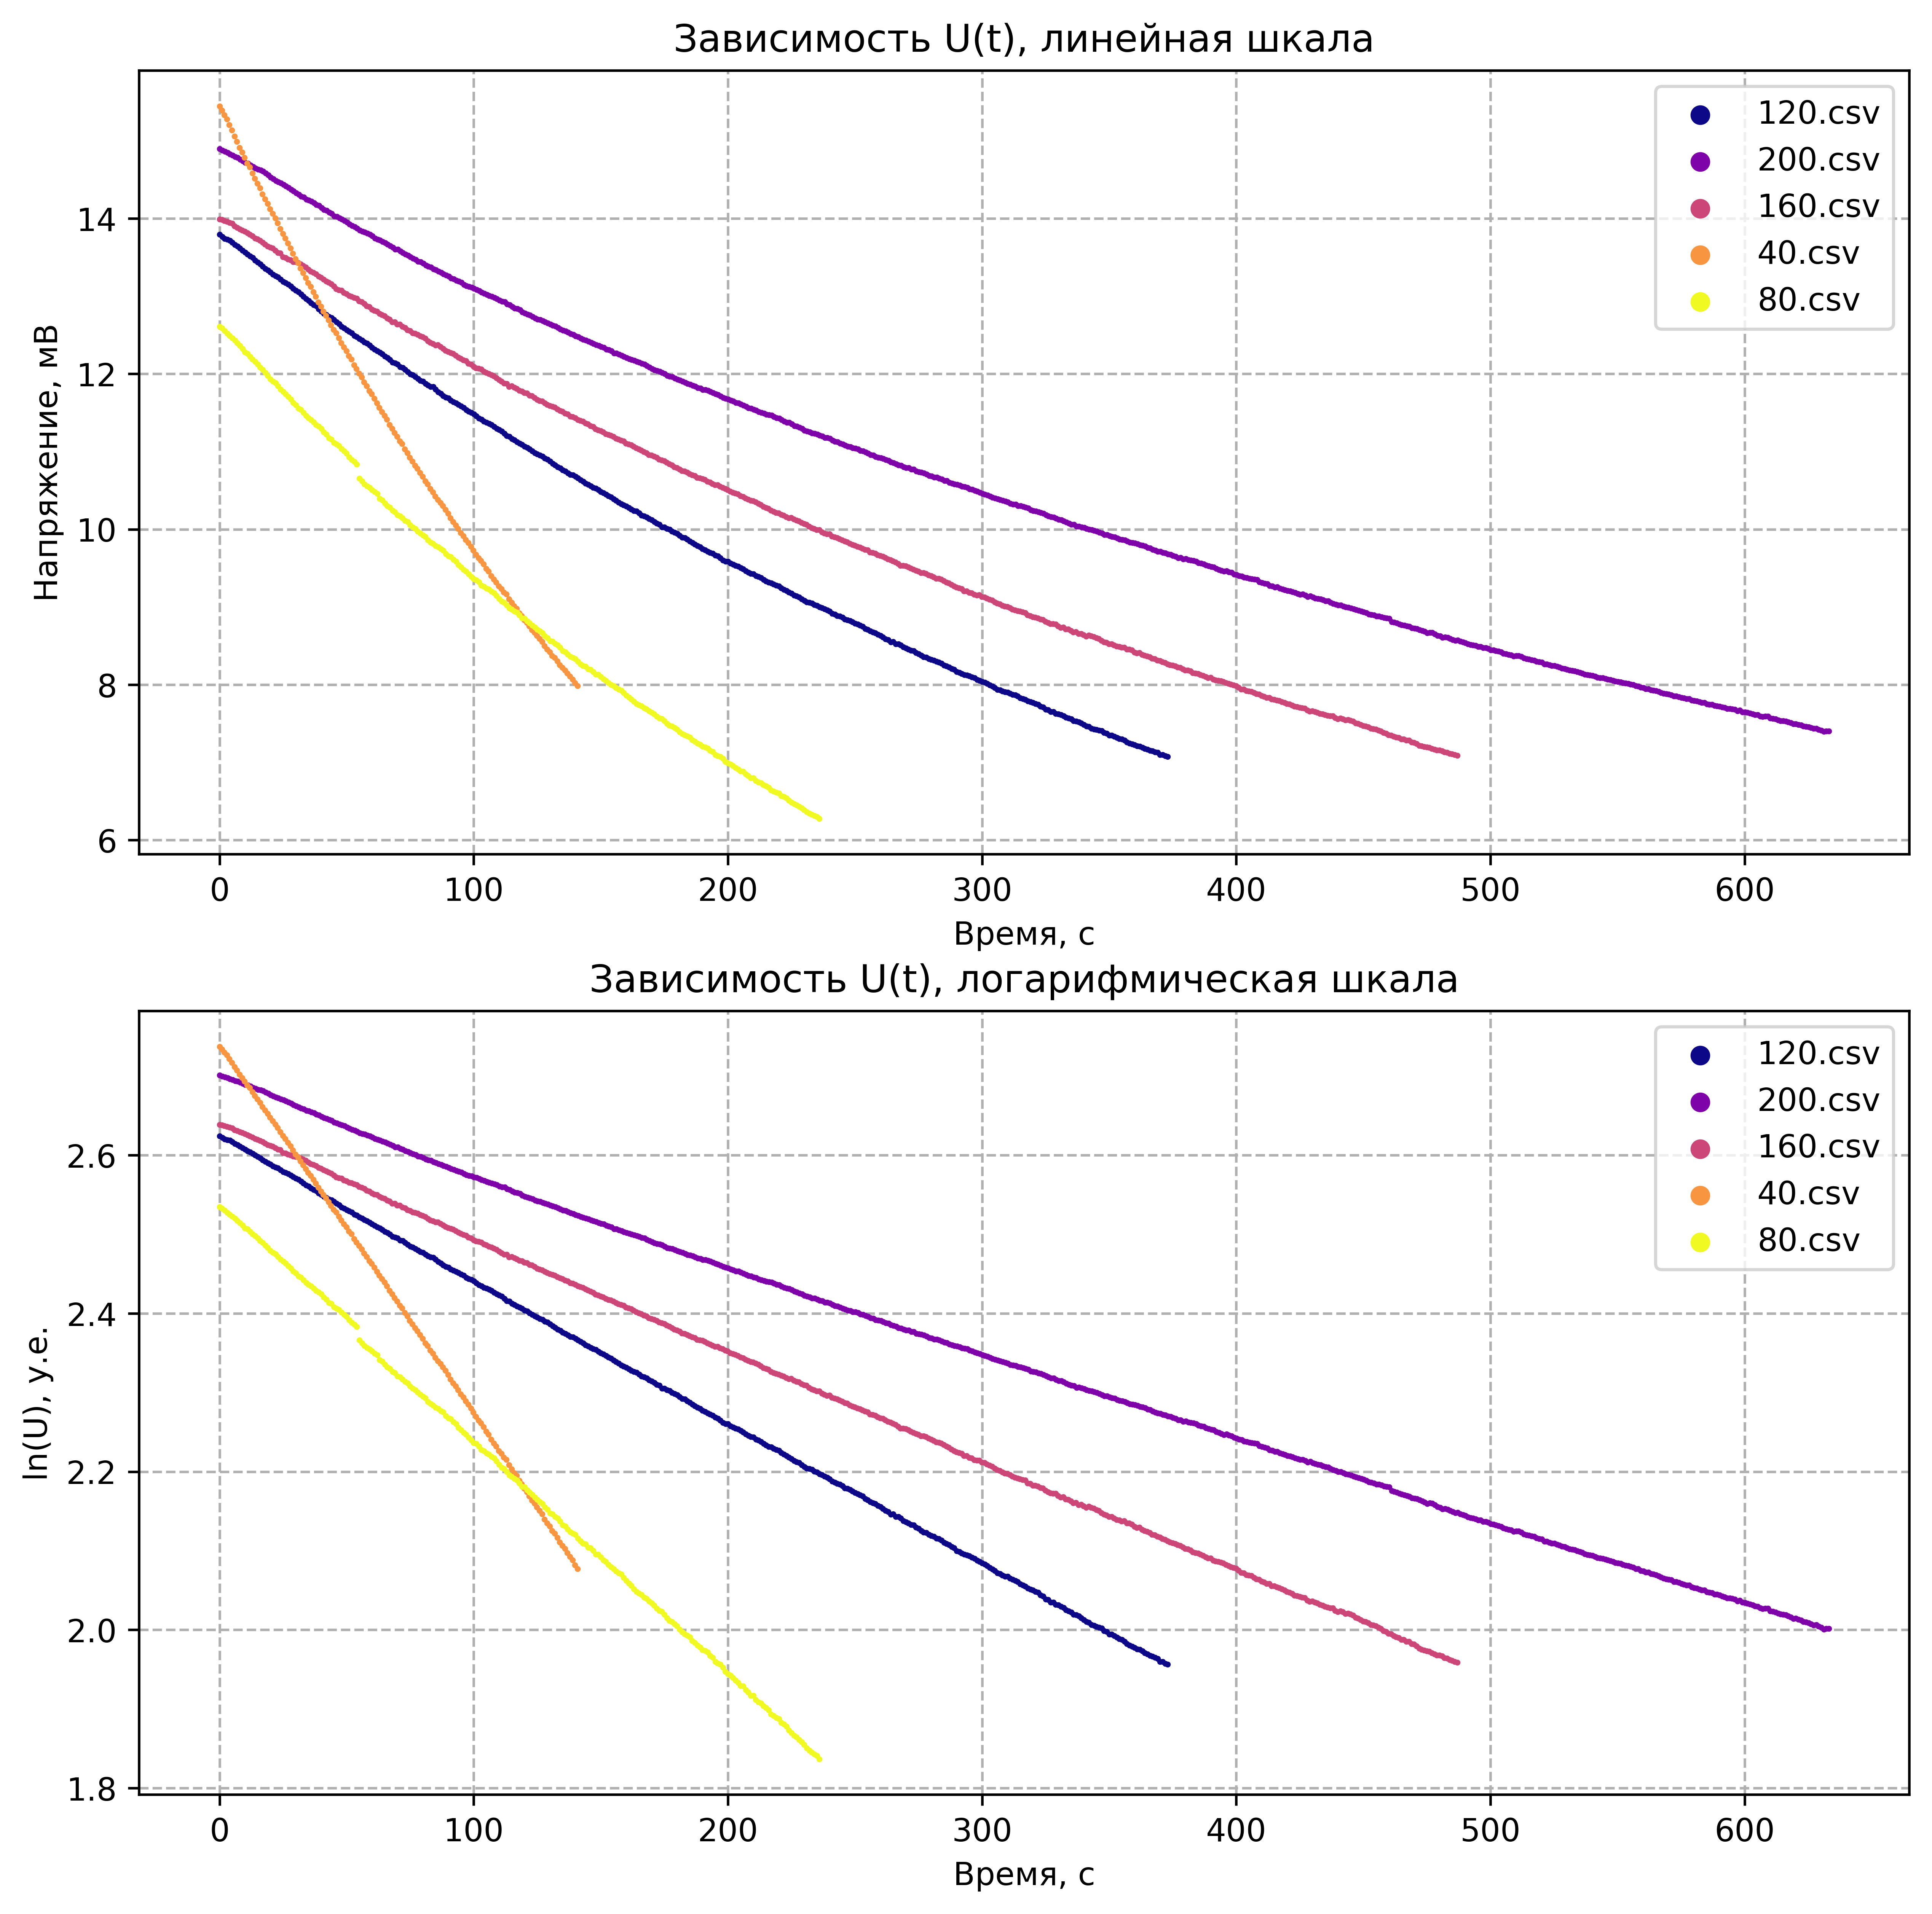

In [16]:
fig, axes = plt.subplots(2,1, figsize=(10,10), dpi=600)
ax = axes[0]
ax_log = axes[1]

### Косметика
ax.grid(which='major', linestyle='--')
ax_log.grid(which='major', linestyle='--')

ax.set_title('Зависимость U(t), линейная шкала')
ax.set_xlabel('Время, с')
ax.set_ylabel('Напряжение, мВ')

ax_log.set_title('Зависимость U(t), логарифмическая шкала')
ax_log.set_xlabel('Время, с')
ax_log.set_ylabel('ln(U), у.е.')

n = len(FILENAMES)
color = iter(cm.plasma(np.linspace(0, 1, n)))

TAUS = []
SIGMA_TAUS = []
for filename in FILENAMES:    
    times, voltages = [], []
    with open('lab_data/' + filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        for row in reader:
            time    = row[0]
            voltage = row[1]
            times.append(float(time))
            voltages.append(float(voltage))

    times = np.array(times); voltages = np.array(voltages)

    c = next(color)
    ax.scatter(times, voltages, zorder=2, color=c, marker='.', s=3, label=filename)
    ax_log.scatter(times, np.log(voltages), zorder=2, color=c, marker='.', s=3, label=filename)

    (k, b) = np.polyfit(times, np.log(voltages), 1)
    # ax_log.plot(times, k * times + b, color='r', label=r'Аппроксимация ln(U) = k * t + b')
    # ax_log.text(550, 2.6,f'k = {k:.3f}, b = {b:.3f}\n' + r'k = - $\frac{1}{\tau}$, b = ln($U_0$)')

    ax_log.legend(markerscale=6)
    ax.legend(markerscale=6)

    print(filename)
    print(f'k = {k}, b = {b}')
    print(f'tau = {-1 / k}, U_0 = {np.exp(b)}\n')
    TAUS.append(- 1 / k)
    
    x = times
    y = voltages
    n = len(x)
    #error_k = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - k**2)
    #print(f'error_k = {error_k}')
    #error_tau = error_k / (k * k)
    #print(f'error_tau = {error_tau}\n')
    
print(TAUS)

### Расчёт коэфф. диффузии
$$ D = \frac{LV}{2S\tau} $$

DS: [3.67798001 2.24558715 2.86966131 9.626709   6.08727976]
sigma_DS = [0.3362965633418407, 0.20532159053886856, 0.262384691281934, 0.8803773777824447, 0.5566208950920265]
k = 367.9114249480582, b = 0.7011213460694511
error_k = 24.755188446496206
Если P0 = 738.9 торр, то L = 0.49791774928685645


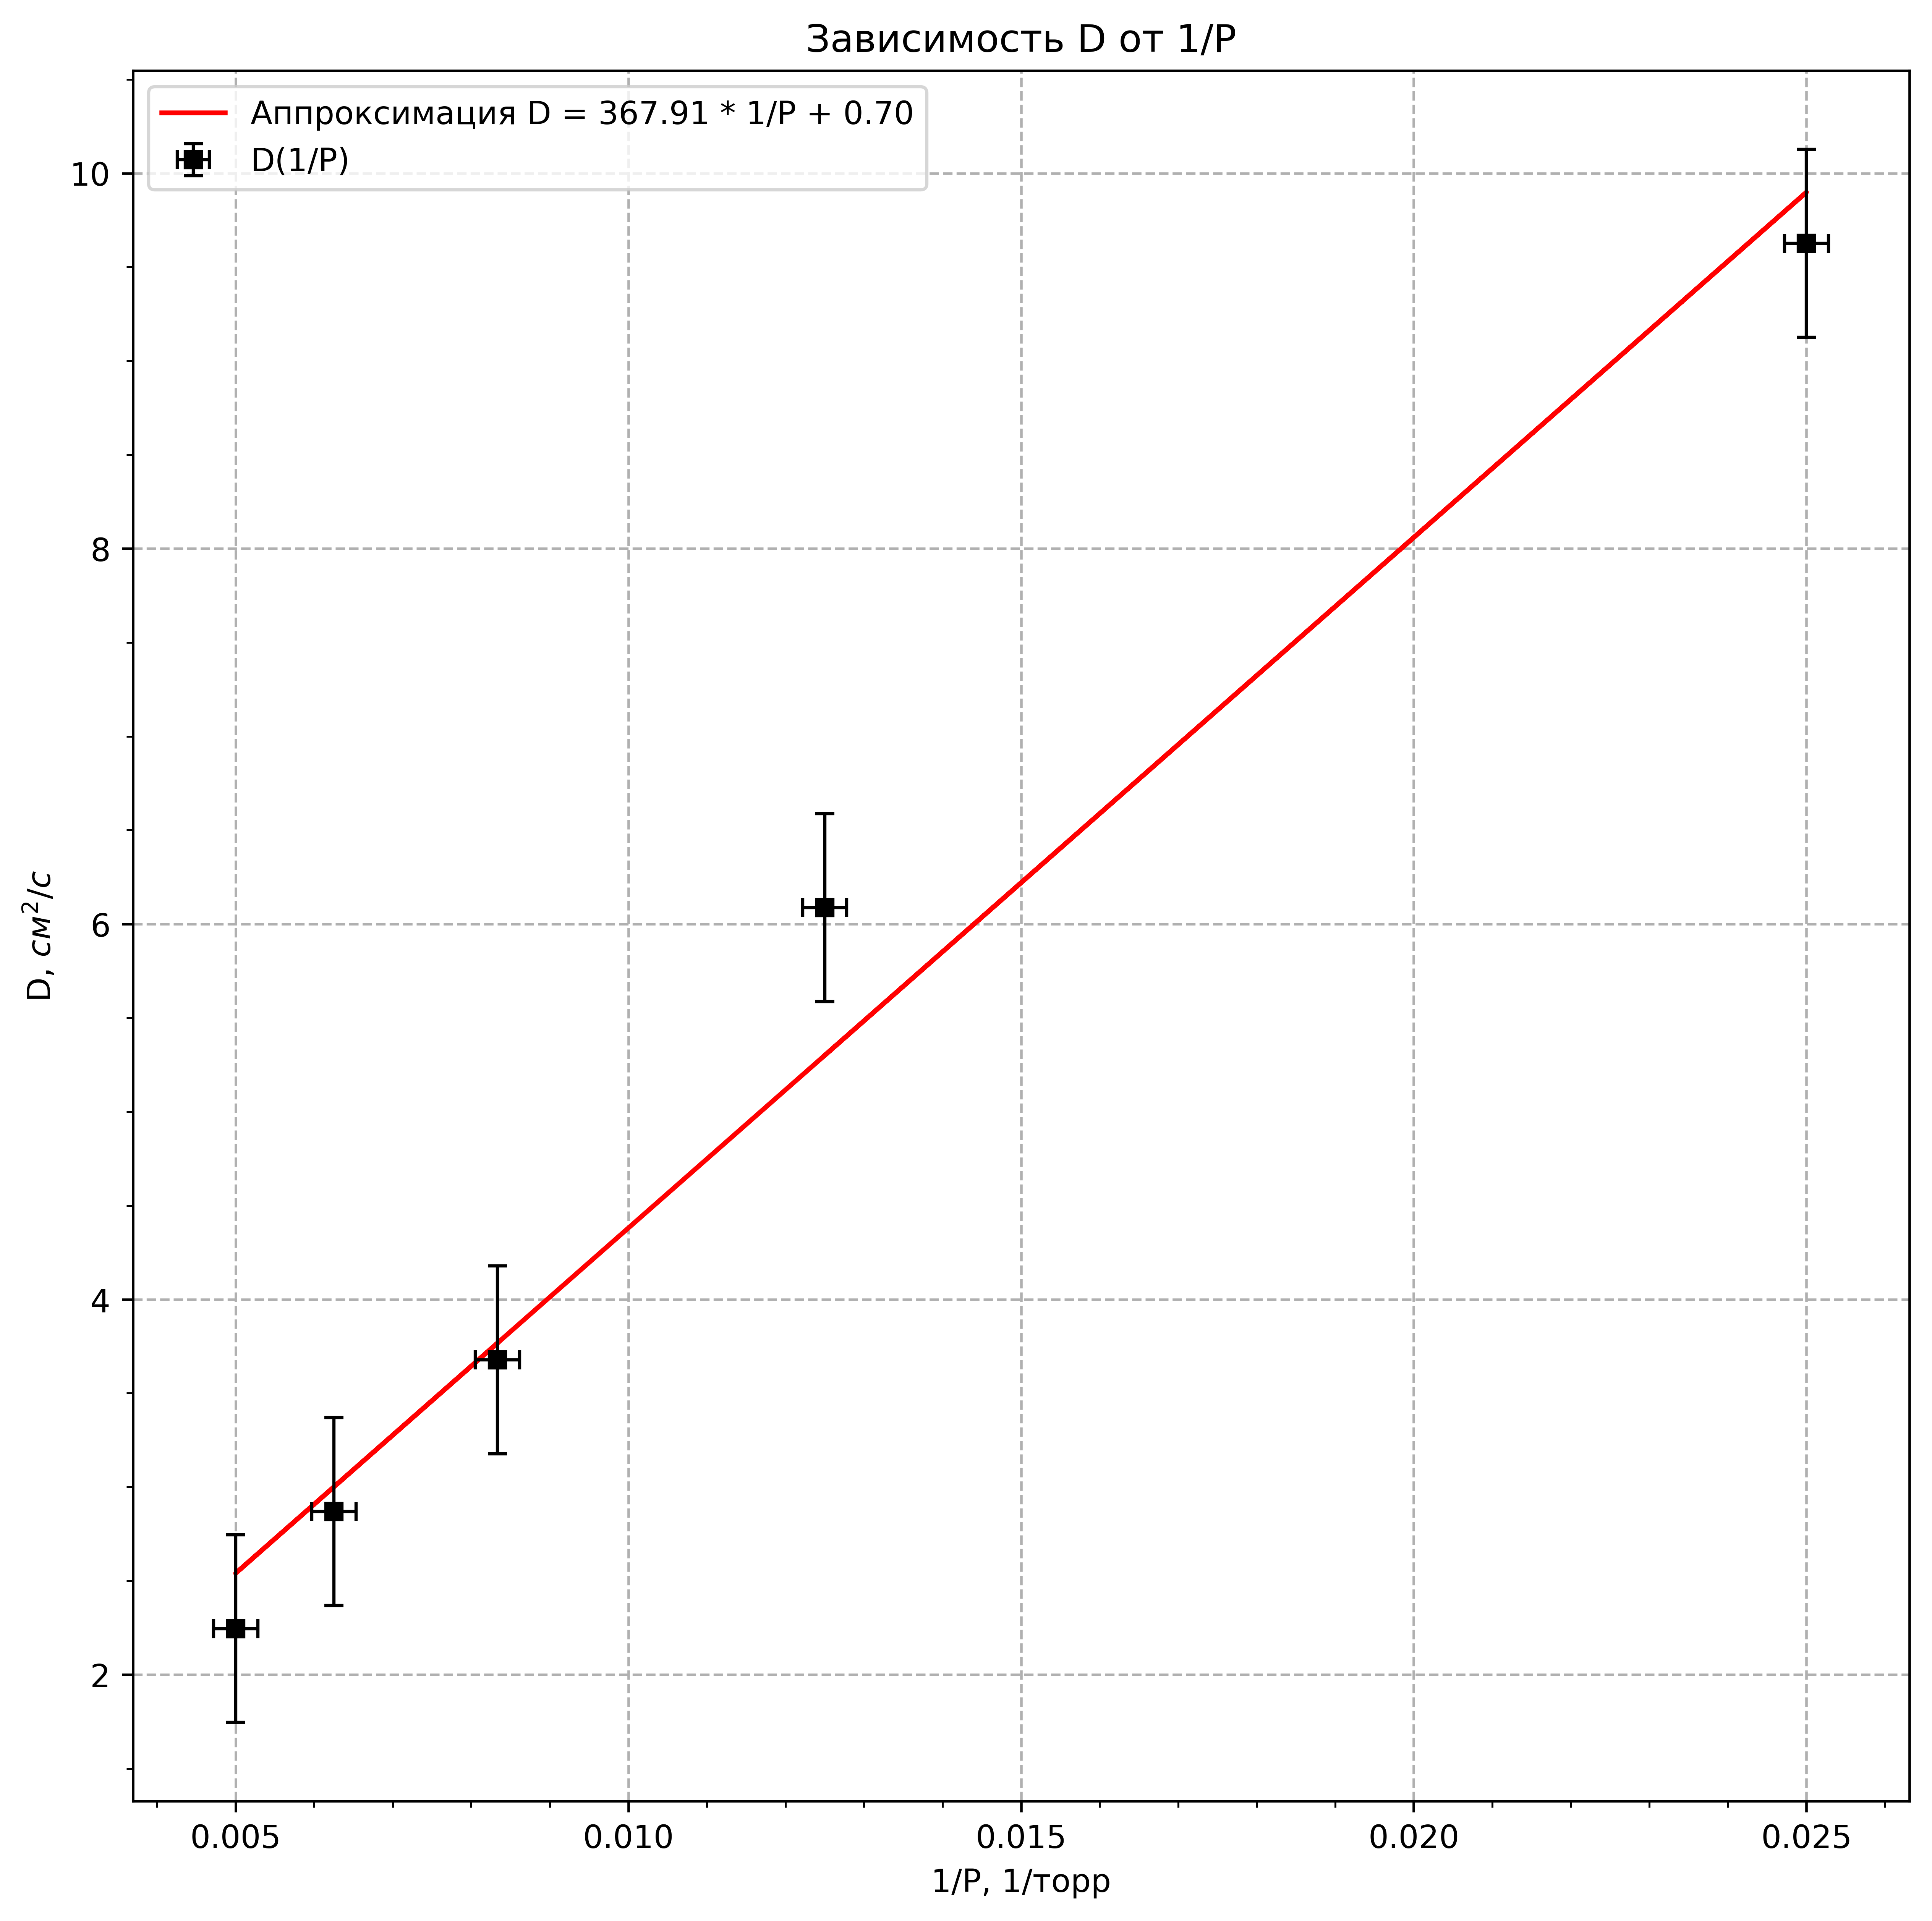

In [15]:
def D(V, L_S, tau):
    return tau * V * L_S / 2

V = 775   
L_S = 5.3 
DS = []
for tau in TAUS:
    D = V * L_S / (2 * tau)
    DS.append(D)
DS = np.array(DS)
print('DS:', DS)
### ПОГРЕШНОСТИ
sigma_V   =  10
sigma_L_S = 0.1
sigma_tau = 0.1

sigma_DS = []
for tau in TAUS:
    sigma_D = np.sqrt(
        np.square(2 * L_S * sigma_V / tau) +\
        np.square(2 * V * sigma_L_S / tau) +\
        np.square(2 * V * L_S * sigma_tau / (tau * tau))
    )
    sigma_DS.append(sigma_D)
print(f'sigma_DS = {sigma_DS}')


###############


fig, ax = plt.subplots(figsize=(10,10), dpi=600)
ax.set_xlabel('1/P, 1/торр')
ax.set_ylabel('D, $см^2/с$')
ax.set_title('Зависимость D от 1/P')
ax.minorticks_on()
ax.grid(which='major', linestyle='--')

PS = np.array([120, 200, 160, 40, 80])

# ax.scatter(1 / PS, DS, color='k', zorder=2)
xerr_1, yerr_1 = 1.8 / (80 * 80), 0.5
ax.errorbar(1/PS, DS, fmt='ks', linewidth=0, markersize=5, elinewidth=1, label='D(1/P)', xerr=xerr_1, yerr=yerr_1,
    capsize=3, zorder=3
)

(k, b) = np.polyfit(1 / PS, DS, 1)
ax.plot(1 / PS, k * (1 / PS) + b, color='r', label=f'Аппроксимация D = {k:.2f} * 1/P + {b:.2f}')
ax.legend()

print(f'k = {k}, b = {b}')

x = 1 / PS
y = DS
n = len(x)
error_k = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - k**2)
print(f'error_k = {error_k}')

print(f'Если P0 = 738.9 торр, то L = {k * (1 / 738.9)}')

### Расчёт длины свободного пробега и sigma

$$ \lambda = 3D \sqrt{\frac{\pi \mu_{He}}{8RT}} $$
$$ \sigma  = \frac{kT}{P\lambda} $$

In [4]:
LS = []
mu = 4 / 1e3
R  = 8.31
T  = 293
for D in DS:
    D = D / 1e4
    L = 3 * D * np.sqrt(np.pi * mu / (8 * R * T))
    LS.append(L)
print(f'LS: {LS}')

SIGMAS = []
k_b    = 1.3 / 1e23
for L, P in zip(LS, PS):
    P = P * 133.3
    sigma = k_b * T / (P * L)
    SIGMAS.append(sigma)
print(f'Sigmas: {SIGMAS}')

LS: [8.862499748470091e-07, 5.41099068810837e-07, 6.914766415932251e-07, 2.3196620383360423e-06, 1.4667974034056406e-06]
Sigmas: [1.6121097022230093e-19, 3.300532807665098e-19, 1.0331022749762252e-18, 1.0265376014793879e-19, 2.435121884809214e-19]


In [14]:
k = 1.3 / 1e23
T = 293
R = 8.31
mu = 4 / 1e3
sgm = k * T / (3 * (4.9 - 0.33)) * np.sqrt(8 * R * T / (np.pi * mu))
print(f'sigma = {sgm}')

L = 3 * (0.5 / 1e4) * np.sqrt(np.pi * mu / (8 * R * T))
print(L)

sigma = 3.4589788094272936e-19
1.204805317081184e-07
